## Methanol dasar
#### Notebook to make moment maps of the 107 GHz methanol "dasar" line, as well as other methanol lines in our ID list. Also to make moment maps of all in-band c-HCCCH lines.

In [3]:
from astropy.table import Table, vstack
import glob

tbls = []
tbl_fns = glob.glob('/orange/adamginsburg/brick_alma_linesurvey/abulatek/first_results/modeling/line_lists/*.csv')
for tbl_fn in tbl_fns:
    tbl = Table.read(tbl_fn)
    tbl.remove_column('Spectrum')
    tbls.append(tbl)
    
combined_tbls = vstack(tbls)

In [4]:
methanol_lines = combined_tbls[combined_tbls['Species'] == 'CH3OHvt=0-2']
# methanol13_lines = combined_tbls[combined_tbls['Species'] == '13CH3OHvt=0']

In [5]:
def clean_name(x):
    return x.replace("(","").replace(")","").replace("=","").replace("+","p").replace("/","")

In [6]:
# fns = glob.glob("/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source*clean_2sigma_n50000_masked_3sigma_pbmask0p18.image")

In [7]:
from spectral_cube import SpectralCube
from astropy import units as u

basedir = '/orange/adamginsburg/brick_alma_linesurvey/abulatek/first_results/figures/methanol_moments'
# basedir2 = '/orange/adamginsburg/brick_alma_linesurvey/abulatek/first_results/figures/methanol_peak_intensity'

vmin = -20*u.km/u.s # I did -10 km/s originally
vmax = 25*u.km/u.s # I did 50 km/s and 70 km/s originally, then for mom0, I did 15 km/s

# for fn in fns:
#     cube = SpectralCube.read(fn, use_dask=True).with_spectral_unit(u.GHz)

#     slc  = cube[:1].subcube_slices_from_mask(cube[:1].mask)
#     cube = cube[:,slc[1],slc[2]]
#     cube.beam_threshold = 10000

#     # THIS SHOULD ALL BE REST FREQUENCY! BECAUSE WE'LL CAPTURE EMISSION WITHIN THE VEL RANGE

#     for row in methanol_lines:
#         restf = u.Quantity(row['Frequency (GHz)'], u.GHz)
#         if cube.spectral_axis.min() < restf and cube.spectral_axis.max() > restf:
#             outfn = f"{clean_name(row['Species'])}_rest{row['Frequency (GHz)']:0.4f}_{row['Dataset']}_{round(vmax.value)}kms"
#             filename_to_test = outfn.split('.mom0')[0]
#             if not glob.glob(f'{basedir}/{filename_to_test}*.mom0.png'):
#                 print(outfn)
#                 scube = cube.with_spectral_unit(u.km/u.s, rest_value=restf, velocity_convention='radio').spectral_slab(vmin, vmax)
#                 mx = scube.max(axis=0)
#                 mx.quicklook(f'{basedir2}/{outfn}.max.png')
#                 # m0 = scube.moment0(axis=0)
#                 # m0.quicklook(f'{basedir}/{outfn}.mom0.png')

In [8]:
# from astroquery.splatalogue import Splatalogue

# xtbl = Splatalogue.query_lines(85*u.GHz, 275.5*u.GHz, chemical_name='c-HCCCH', 
#                                energy_max=50, energy_type='eu_k', line_lists=['SLAIM'])
# xtbl_filtered = xtbl[xtbl['Log<sub>10</sub> (A<sub>ij</sub>)'] > -5]
# xtbl_filtered

In [9]:
# basedir_c = '/orange/adamginsburg/brick_alma_linesurvey/abulatek/first_results/figures/cyclopropenylidene_moments'

# for fn in fns:
#     cube = SpectralCube.read(fn, use_dask=True).with_spectral_unit(u.GHz)

#     slc  = cube[:1].subcube_slices_from_mask(cube[:1].mask)
#     cube = cube[:,slc[1],slc[2]]
#     cube.beam_threshold = 10000

#     # THIS SHOULD ALL BE REST FREQUENCY! BECAUSE WE'LL CAPTURE EMISSION WITHIN THE VEL RANGE

#     for row in xtbl_filtered:
#         restf = u.Quantity(row['Freq-GHz(rest frame,redshifted)'], u.GHz)
#         if cube.spectral_axis.min() < restf and cube.spectral_axis.max() > restf:
#             outfn = f"{clean_name(row['Species'])}_rest{row['Freq-GHz(rest frame,redshifted)']:0.4f}_{round(vmax.value)}kms"
#             filename_to_test = outfn.split('.mom0')[0]
#             if not glob.glob(f'{basedir_c}/{filename_to_test}*.mom0.png'):
#                 print(outfn)
#                 scube = cube.with_spectral_unit(u.km/u.s, rest_value=restf, velocity_convention='radio').spectral_slab(vmin, vmax)
# #                 mx = scube.max(axis=0)
# #                 mx.quicklook(f'{basedir}/{outfn}.max.png')
#                 m0 = scube.moment0(axis=0)
#                 m0.quicklook(f'{basedir_c}/{outfn}.mom0.png')

In [10]:
fn_107 = "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_106_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image"
fn_107_ms = "/blue/adamginsburg/abulatek/brick/dasar/recleaning/brick_107GHz_dasar_line_1mJy_multiscale.image"
fn_108 = "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_107_spw31_clean_2sigma_n50000_masked_3sigma_pbmask0p18.image"
fn_108_ms = "/blue/adamginsburg/abulatek/brick/dasar/recleaning/brick_108GHz_dasar_line_1mJy_multiscale_cyclefactor4.image"

In [11]:
methanol_107 = methanol_lines[methanol_lines['freq_spw'] == '106_spw29']
methanol_108 = methanol_lines[methanol_lines['freq_spw'] == '107_spw31'][0]
methanol_107

Dataset,freq_spw,Spectrum type,Species,QNs,Frequency (GHz),Observed frequency (GHz),Velocity (km/s),Comment,E_u (K)
str7,str10,str7,str22,str38,float64,float64,float64,str170,float64
data_59,106_spw29,mean,CH3OHvt=0-2,"3(1,3)-4(0,4)A,vt=0",107.013831,107.0106,9.0,Absorption against the CMB!!! https://ui.adsabs.harvard.edu/abs/2008A%26A...489.1175P/abstract,--
data_59,106_spw29,mean,CH3OHvt=0-2,"3(1,3)-4(0,4)A,vt=0",107.013831,107.0106,9.0,Absorption against the CMB!!! https://ui.adsabs.harvard.edu/abs/2008A%26A...489.1175P/abstract,--


In [12]:
cube_107 = SpectralCube.read(fn_107, use_dask=True).with_spectral_unit(u.GHz).to(u.K)
cube_107_ms = SpectralCube.read(fn_107_ms, use_dask=True).with_spectral_unit(u.GHz).to(u.K)
cube_108 = SpectralCube.read(fn_108, use_dask=True).with_spectral_unit(u.GHz).to(u.K)
cube_108_ms = SpectralCube.read(fn_108_ms, use_dask=True).with_spectral_unit(u.GHz).to(u.K)

slc_107 = cube_107[:1].subcube_slices_from_mask(cube_107[:1].mask)
slc_107_ms = cube_107_ms[:1].subcube_slices_from_mask(cube_107_ms[:1].mask)
slc_108 = cube_108[:1].subcube_slices_from_mask(cube_108[:1].mask)
slc_108_ms = cube_108_ms[:1].subcube_slices_from_mask(cube_108_ms[:1].mask)

cube_107 = cube_107[:,slc_107[1],slc_107[2]]
cube_107_ms = cube_107_ms[:,slc_107_ms[1],slc_107_ms[2]]
cube_108 = cube_108[:,slc_108[1],slc_108[2]]
cube_108_ms = cube_108_ms[:,slc_108_ms[1],slc_108_ms[2]]

cube_107.beam_threshold = 10000
cube_107_ms.beam_threshold = 10000
cube_108.beam_threshold = 10000
cube_108_ms.beam_threshold = 10000

restf_107 = u.Quantity(methanol_107[0]['Frequency (GHz)'], u.GHz)
print(restf_107)
if (cube_107.spectral_axis.min() < restf_107) and (cube_107.spectral_axis.max() > restf_107):
    scube_107 = cube_107.with_spectral_unit(u.km/u.s, rest_value=restf_107, velocity_convention='radio').spectral_slab(vmin, vmax)
    m0_107 = scube_107.moment0(axis=0)
    
restf_107_ms = u.Quantity(methanol_107[0]['Frequency (GHz)'], u.GHz)
if (cube_107_ms.spectral_axis.min() < restf_107_ms) and (cube_107_ms.spectral_axis.max() > restf_107_ms):
    scube_107_ms = cube_107_ms.with_spectral_unit(u.km/u.s, rest_value=restf_107_ms, velocity_convention='radio').spectral_slab(vmin, vmax)
    m0_107_ms = scube_107_ms.moment0(axis=0)

restf_108 = u.Quantity(methanol_108['Frequency (GHz)'], u.GHz)
if (cube_108.spectral_axis.min() < restf_108) and (cube_108.spectral_axis.max() > restf_108):
    scube_108 = cube_108.with_spectral_unit(u.km/u.s, rest_value=restf_108, velocity_convention='radio').spectral_slab(vmin, vmax)
    m0_108 = scube_108.moment0(axis=0)
    
restf_108_ms = u.Quantity(methanol_108['Frequency (GHz)'], u.GHz)
print(restf_108_ms)
print(cube_108_ms.spectral_axis.min(), cube_108_ms.spectral_axis.max())
if (cube_108_ms.spectral_axis.min() < restf_108_ms) and (cube_108_ms.spectral_axis.max() > restf_108_ms):
    scube_108_ms = cube_108_ms.with_spectral_unit(u.km/u.s, rest_value=restf_108_ms, velocity_convention='radio').spectral_slab(vmin, vmax)
    m0_108_ms = scube_108_ms.moment0(axis=0)
    print("I made the mom0 map for 108 MS")
    
# Make the mom0s better
fn_pb_107 = "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_106_spw29_clean_2sigma_n50000_masked_3sigma_pbmask0p18.pb"
fn_pb_107_ms = "/blue/adamginsburg/abulatek/brick/dasar/recleaning/brick_107GHz_dasar_line_1mJy_multiscale.pb"
fn_pb_108 = "/orange/adamginsburg/brick_alma_linesurvey/2019.1.00092.S/imaging_results/source_ab_107_spw31_clean_2sigma_n50000_masked_3sigma_pbmask0p18.pb"
fn_pb_108_ms = "/blue/adamginsburg/abulatek/brick/dasar/recleaning/brick_108GHz_dasar_line_1mJy_multiscale_cyclefactor4.pb"

pb_107 = SpectralCube.read(fn_pb_107, format = 'casa_image')
pb_107_ms = SpectralCube.read(fn_pb_107_ms, format = 'casa_image')
pb_108 = SpectralCube.read(fn_pb_108, format = 'casa_image')
pb_108_ms = SpectralCube.read(fn_pb_108_ms, format = 'casa_image')

m0_107_better = (m0_107*(m0_107.shape[0]*m0_107.shape[1]))/pb_107.sum()
m0_107_ms_better = (m0_107_ms*(m0_107_ms.shape[0]*m0_107_ms.shape[1]))/pb_107_ms.sum()
m0_108_better = (m0_108*(m0_108.shape[0]*m0_108.shape[1]))/pb_108.sum()
m0_108_ms_better = (m0_108_ms*(m0_108_ms.shape[0]*m0_108_ms.shape[1]))/pb_108_ms.sum()

/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide 

107.013831 GHz


/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/radio_beam-0.3.3-py3.9.egg/radio_beam/multiple_beams.py:265: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/radio_beam-0.3.3-py3.9.egg/radio_beam/multiple_beams.py:265: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/radio_beam-0.3.3-py3.9.egg/radio_beam/multiple_beams.py:265: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


108.893929 GHz
108.862921 GHz 108.90881338420179 GHz


/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/radio_beam-0.3.3-py3.9.egg/radio_beam/multiple_beams.py:265: UserWarning: Do not use the average beam for convolution! Use the smallest common beam from `Beams.common_beam()`.
  warnings.warn("Do not use the average beam for convolution! Use the"


I made the mom0 map for 108 MS


/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/blue/adamginsburg/abulatek/miniconda3/lib/python3.9/site-packages/casa_formats_io-0.0.0-py3.9-linux-x86_64.egg/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide 

In [13]:
print(restf_108)

108.893929 GHz


In [14]:
list(pb_107[:,256,256] == 1.).count(False)

0

## Matplotlib stuff

In [15]:
import matplotlib.pyplot as plt
import numpy as np

SM_SIZE = 10
MD_SIZE = 14
LG_SIZE = 16

plt.rc('font', size = MD_SIZE)          # controls default text sizes
plt.rc('axes', titlesize = LG_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize = MD_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize = MD_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize = SM_SIZE)    # legend fontsize
plt.rc('figure', titlesize = LG_SIZE)   # fontsize of the figure title

## Regular cleaning

In [16]:
# plt.figure(figsize = (20, 5))

# from astropy.visualization import simple_norm
# highest_freq_norm = simple_norm(m0_108_better.value, min_percent = 1, max_percent = 99.99)

# ax1 = plt.subplot(131,) 
# ax2 = plt.subplot(132,)
# ax3 = plt.subplot(133,)

# contour_levels = [0.003]

# im1 = ax1.imshow(m0_107_better.value, norm = highest_freq_norm, origin = 'lower', cmap = 'inferno')
# im2 = ax2.imshow(m0_108_better.value, norm = highest_freq_norm, origin = 'lower', cmap = 'inferno')
# ax3.imshow(m0_107_better.value, norm = highest_freq_norm, origin = 'lower', cmap = 'inferno')
# ax3.contour(m0_108_better.value, contour_levels, colors = 'w', 
#             extent = (0, m0_107_better.shape[0], 0, m0_107_better.shape[1]))

# im_ratio_107 = m0_107_better.shape[0]/m0_107_better.shape[1]
# im_ratio_108 = m0_108_better.shape[0]/m0_108_better.shape[1]

# cbar1 = plt.colorbar(mappable = im1, ax = ax1, label = r"Integrated intensity [K km s$^{-1}$]", fraction = 0.047*im_ratio_107)
# cbar2 = plt.colorbar(mappable = im2, ax = ax2, label = r"Integrated intensity [K km s$^{-1}$]", fraction = 0.047*im_ratio_108)

# for ax in [ax1, ax2, ax3]:
#     ax.tick_params(direction = 'in')
#     ax.xaxis.set_tick_params(labelbottom = False)
#     ax.yaxis.set_tick_params(labelleft = False)
    
# ax1.set_title("CH$_3$OH $3_1 - 4_0$ A at 107 GHz", y = 1.01)
# ax2.set_title("CH$_3$OH $0_0 - 1_{-1}$ at 108.9 GHz", y = 1.01)
# ax3.set_title("108.9 GHz contours on 107 GHz image", y = 1.01)

# # plt.suptitle(f'Range: {round(vmin.value)} km/s to {round(vmax.value)} km/s', fontsize = 20, y = 1.02)

# plt.rcParams.update({
#     "figure.facecolor":  'w',
#     "axes.facecolor":    'w',
#     "savefig.facecolor": 'w'
# })
# print(f'{basedir}/methanol_comparison_{round(vmax.value)}kms.pdf')
# plt.savefig(f'{basedir}/methanol_comparison_{round(vmax.value)}kms.pdf')
# plt.savefig(f'{basedir}/methanol_comparison_{round(vmax.value)}kms.png', dpi = 250, bbox_inches = 'tight')
# # Also save to paper directory
# plt.savefig(f'/blue/adamginsburg/abulatek/brick/dasar/632e0742965a6e88270d73d7/figures/methanol_comparison_{round(vmax.value)}kms.pdf', bbox_inches = 'tight')
# plt.savefig(f'/blue/adamginsburg/abulatek/brick/dasar/632e0742965a6e88270d73d7/figures/methanol_comparison_{round(vmax.value)}kms.png', dpi = 250, bbox_inches = 'tight')

## Multiscale cleaning

107 GHz beam: Beam: BMAJ=1.4855471319622464 arcsec BMIN=1.0282038781378005 arcsec BPA=-74.02829064258815 deg
108 GHz beam: Beam: BMAJ=1.3697296579678853 arcsec BMIN=0.9975558254453871 arcsec BPA=-67.69364929211952 deg
/orange/adamginsburg/brick_alma_linesurvey/abulatek/first_results/figures/methanol_moments/methanol_comparison_25kms_multiscale.pdf


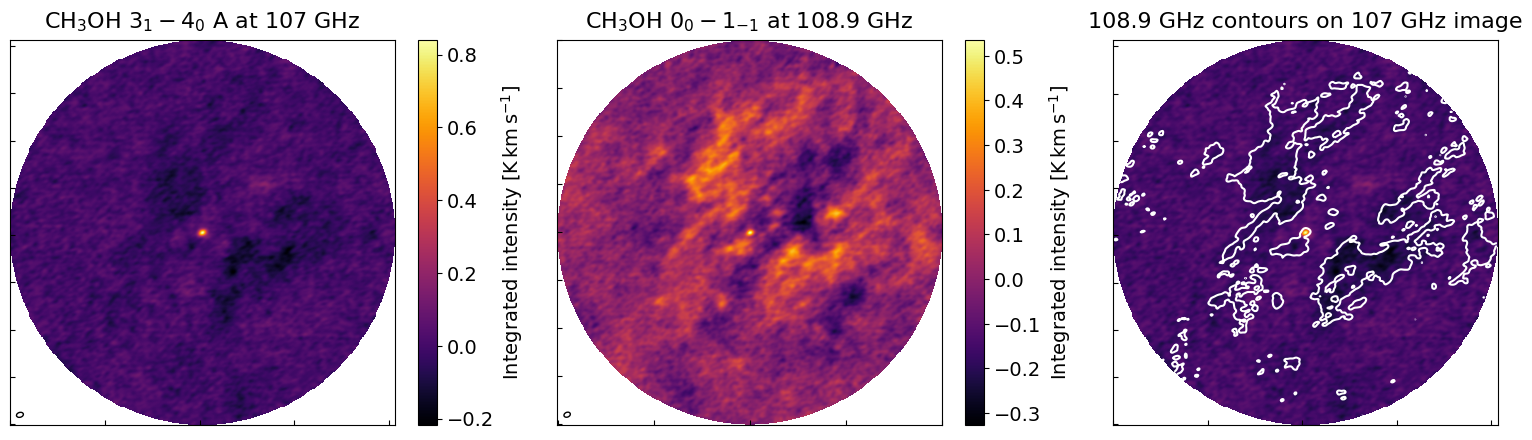

In [22]:
from astropy.visualization import simple_norm
from astropy import wcs

plt.figure(figsize = (20, 5))

highest_freq_norm = simple_norm(m0_108_ms_better.value, min_percent = 1, max_percent = 99.99)

ax1 = plt.subplot(131,) 
ax2 = plt.subplot(132,)
ax3 = plt.subplot(133,)

contour_levels = [0.1] # used to be 2.5 before I changed to "better" moment maps

im1 = ax1.imshow(m0_107_ms_better.value, origin = 'lower', cmap = 'inferno') # norm = highest_freq_norm, vmin = -0.2, vmax = 0.1
im2 = ax2.imshow(m0_108_ms_better.value, origin = 'lower', cmap = 'inferno') # norm = highest_freq_norm, vmin = -0.015, vmax = 0.015
ax3.imshow(m0_107_ms_better.value, origin = 'lower', cmap = 'inferno') # norm = highest_freq_norm, vmin = -0.2, vmax = 0.1
ax3.contour(m0_108_ms_better.value, contour_levels, colors = 'w', 
            extent = (0, m0_107_ms_better.shape[0], 0, m0_107_ms_better.shape[1]))

im_ratio_107_ms = m0_107_ms_better.shape[0]/m0_107_ms_better.shape[1]
im_ratio_108_ms = m0_108_ms_better.shape[0]/m0_108_ms_better.shape[1]

cbar1 = plt.colorbar(mappable = im1, ax = ax1, label = f"Integrated intensity [{m0_107_ms_better.unit.to_string(format = 'latex_inline')}]", fraction = 0.047*im_ratio_107_ms)
cbar2 = plt.colorbar(mappable = im2, ax = ax2, label = f"Integrated intensity [{m0_108_ms_better.unit.to_string(format = 'latex_inline')}]", fraction = 0.047*im_ratio_108_ms)

# Make beam for 107 GHz panel
pixscale_107 = np.abs((wcs.utils.proj_plane_pixel_area(m0_107_ms_better.wcs)**0.5*u.deg).to(u.arcsec))
bm_107 = m0_107_ms_better.beam
print("107 GHz beam:", bm_107)
bmell_107 = bm_107.ellipse_to_plot(10, 10, pixscale_107) # 5 4 is coordinate, need to get pixscale
bmell_107.set_facecolor('none')
bmell_107.set_edgecolor('k')
ax1.add_artist(bmell_107)

# Make beam for 108 GHz panel
pixscale_108 = np.abs((wcs.utils.proj_plane_pixel_area(m0_108_ms_better.wcs)**0.5*u.deg).to(u.arcsec))
bm_108 = m0_108_ms_better.beam
print("108 GHz beam:", bm_108)
bmell_108 = bm_108.ellipse_to_plot(10, 10, pixscale_108) # 5 4 is coordinate, need to get pixscale
bmell_108.set_facecolor('none')
bmell_108.set_edgecolor('k')
ax2.add_artist(bmell_108)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(direction = 'in')
    ax.xaxis.set_tick_params(labelbottom = False)
    ax.yaxis.set_tick_params(labelleft = False)
    
ax1.set_title("CH$_3$OH $3_1 - 4_0$ A at 107 GHz", y = 1.01)
ax2.set_title("CH$_3$OH $0_0 - 1_{-1}$ at 108.9 GHz", y = 1.01)
ax3.set_title("108.9 GHz contours on 107 GHz image", y = 1.01)

# plt.suptitle(f'Range: {round(vmin.value)} km/s to {round(vmax.value)} km/s', fontsize = 20, y = 1.02)

plt.rcParams.update({
    "figure.facecolor":  'w',
    "axes.facecolor":    'w',
    "savefig.facecolor": 'w'
})
print(f'{basedir}/methanol_comparison_{round(vmax.value)}kms_multiscale.pdf')
plt.savefig(f'{basedir}/methanol_comparison_{round(vmax.value)}kms_multiscale.pdf')
plt.savefig(f'{basedir}/methanol_comparison_{round(vmax.value)}kms_multiscale.png', dpi = 250, bbox_inches = 'tight')
# Also save to paper directory
plt.savefig(f'/blue/adamginsburg/abulatek/brick/dasar/632e0742965a6e88270d73d7/figures/methanol_comparison_{round(vmax.value)}kms_multiscale.pdf', bbox_inches = 'tight')
plt.savefig(f'/blue/adamginsburg/abulatek/brick/dasar/632e0742965a6e88270d73d7/figures/methanol_comparison_{round(vmax.value)}kms_multiscale.png', dpi = 250, bbox_inches = 'tight')

In [24]:
np.nanmin(m0_107_ms_better)

<Projection -0.21727524 K km / s>